In [1]:
pip show scikit-learn

Name: scikit-learn
Version: 0.22.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: c:\programdata\anaconda3\lib\site-packages
Requires: scipy, numpy, joblib
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
house = pd.read_csv(r'D:\Data\Notes-master\home_data.csv')

In [4]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
print(house.date)

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object


In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Text(0, 0.5, 'price of house')

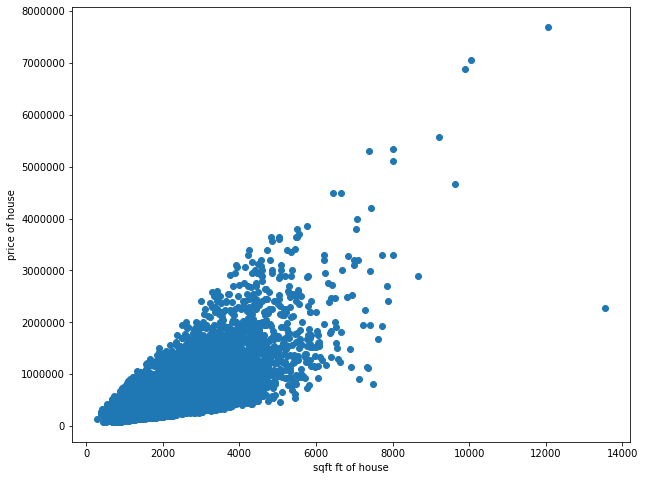

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(house.sqft_living, house.price)
plt.xlabel('sqft ft of house')
plt.ylabel('price of house')

In [9]:
x1 = house [['sqft_lot15']]

In [10]:
y = house ['price']

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [12]:
from sklearn.tree import DecisionTreeRegressor
lin_reg = DecisionTreeRegressor(random_state = 0)
lin_reg.fit(x1,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

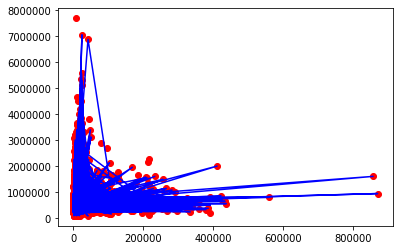

In [13]:
plt.scatter(x1, y, color = 'red')
plt.plot(x1, lin_reg.predict(x1), color = 'blue')
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
import statistics as st
sample = [600,470,170,430,300]
print(st.mean(sample))
print(st.pstdev(sample))
print(st.pvariance(sample))

394
147.32277488562318
21704


In [16]:
X = house[['bedrooms']]

In [17]:
y = house['price']

In [18]:
from sklearn.svm import SVR

In [19]:
model = SVR('rbf')
model.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

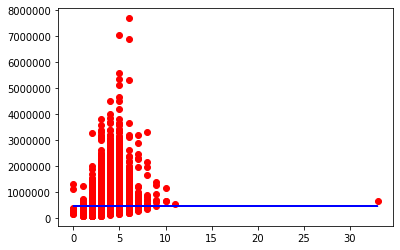

In [20]:
plt.scatter(X,y, color='red')
plt.plot(X, model.predict(X), color='blue')

In [21]:
x1 = house [['id', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y1 = house['price']

In [22]:
print('X Shape', x1.shape)
print('Y Shape', y1.shape)

X Shape (21613, 19)
Y Shape (21613,)


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x1_train, x1_test ,y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state=112)

In [25]:
print(x1_train.shape)

(15129, 19)


In [26]:
print(x1_test.shape)

(6484, 19)


In [27]:
print(y1_train.shape)

(15129,)


In [28]:
print(y1_test.shape)

(6484,)


In [29]:
from sklearn import linear_model
names = house.drop('price', axis = 1).columns
print(names)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [30]:
lasso = linear_model.Lasso(alpha = 0.2)

In [31]:
df = pd.DataFrame(range(21613), columns=(['bathrooms']))
df.bathrooms = df.bathrooms.astype(float)

In [32]:
df = pd.DataFrame(range(21613), columns=(['floors']))
df.floors = df.floors.astype(float)

In [33]:
df = pd.DataFrame(range(21613), columns=(['lat']))
df.lat = df.lat.astype(float)

In [34]:
df = pd.DataFrame(range(21613), columns=(['long']))
df.long = df.long.astype(float)

In [35]:
lasso_coef = lasso.fit(x1, y1).coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 398098036057600.7, tolerance: 291291675375.9437
  positive)


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7) 

NameError: name 'x' is not defined

In [ ]:
print (x_train.shape, y_train.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
sc = StandardScaler()

In [ ]:
x = sc.fit_transform(x)

In [ ]:
print(x)

In [ ]:
x_test = sc.fit_transform(x_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2)

In [ ]:
poly.fit(x_train, y_train)

In [ ]:
y_pred = poly.predict(x_test)

In [ ]:
print (x_test.shape, y_test.shape)

In [ ]:
sns.lmplot('sqft_living', 'price', data=house)

In [ ]:
sns.heatmap(house.corr())

In [ ]:
sns.distplot(house['price'])

In [ ]:
house1 = house[house['id']==6414100192]

In [ ]:
house1

In [ ]:
house1['price']

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[1]

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred)

In [ ]:
model.coef_

In [ ]:
dframe_coef = pd.DataFrame(model.coef_, x.columns, columns = ['coffice value'])

In [ ]:
dframe_coef

In [ ]:
model.intercept_

In [ ]:
# Root Mean Square Error (RMSE)

In [ ]:
from sklearn import metrics

In [ ]:
mean_sq_err = metrics.mean_squared_error(y_test, prediction)

In [ ]:
RMSE = np.sqrt(mean_sq_err)

In [ ]:
RMSE

In [ ]:
house.info()